## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")

In [4]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и номинальные.

In [5]:
df.notna()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
df.notna().nunique()

status                     1
duration                   1
credit_history             1
purpose                    1
amount                     1
savings                    1
employment_duration        1
installment_rate           1
personal_status_sex        1
other_debtors              1
present_residence          1
property                   1
age                        1
other_installment_plans    1
housing                    1
number_credits             1
job                        1
people_liable              1
telephone                  1
foreign_worker             1
credit_risk                1
dtype: int64

Если считать пропуском пустые значение, то их нет.
Однако в каждом столбце может отсуствовать информация (будет тип "no checking account"))

In [7]:
import numpy
kolich = [] # сумма кредита, возраст, стаж работы и тд
binar = [] # пол, наличие телефона
poryadkov = [] # образованиеб занимаемая должность - то что можно 
nominal = [] # место проживания, профессия или работодатель

for i in df.columns:
    a = 0
    if type(df[i][0]) != str:
        kolich.append(i)
    elif df[i].nunique() == 2:
        binar.append(i)
    else:
        for j in df[i].unique(): # Чтобы поймать возможность некого ранжирования
            for k in j:
                if a != 1:
                    try:
                        if int(k):
                            poryadkov.append(i)
                            a = 1
                            break
                    except ValueError:
                        break
nominal = list(set(df.columns) - set(kolich) - set(binar) - set(poryadkov))

In [8]:
print(f"Количественные признаки: {kolich}")
print(f"Бинарные признаки: {binar}")
print(f"Порядковые признаки: {poryadkov}")
print(f"Номинальные признаки: {nominal}")

Количественные признаки: ['duration', 'amount', 'age']
Бинарные признаки: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Порядковые признаки: ['savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
Номинальные признаки: ['other_installment_plans', 'status', 'housing', 'personal_status_sex', 'other_debtors', 'credit_history', 'property', 'purpose', 'job']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
df.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
print(f"Процент клиентов моложе 30 лет, снимающие жилье: {round(df[(df['age'] < 30) & (df['housing'] == 'rent')].shape[0] * 100 /df[df['age'] < 30].shape[0], 2)} %")
print(f"Процент клиентов страше 40 лет, снимающие жилье: {round(df[(df['age'] > 40) & (df['housing'] == 'rent')].shape[0] * 100 /df[df['age'] > 40].shape[0], 2)} %")

Процент клиентов моложе 30 лет, снимающие жилье: 66.67 %
Процент клиентов страше 40 лет, снимающие жилье: 68.01 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
df["number_credits"].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [12]:
df["kat_number_credits"] = df.apply(lambda row: int(row.number_credits[0]) if row.number_credits[0]!= ">" else 4, axis= 1)

In [13]:
df["kat_number_credits"].unique()

array([1, 2, 4])

In [14]:
df[(df["foreign_worker"] == "yes") & (df["kat_number_credits"] > 3)]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,kat_number_credits
213,0<= ... < 200 DM,6,all credits at this bank paid back duly,others,1299,unknown/no savings account,1 <= ... < 4 yrs,>= 35,male : married/widowed,none,...,74,none,rent,4-5,unemployed/unskilled - non-resident,3 or more,no,yes,good,4


In [15]:
print(f'у {df[(df["foreign_worker"] == "yes") & (df["kat_number_credits"] > 3 )].shape[0]} иностранца)')

у 1 иностранца)


### Задание 6 (1 балл)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

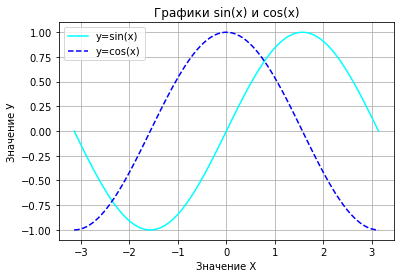

In [17]:
fig = plt.subplot()
plt.grid()
x = np.linspace(-np.pi, np.pi,100)
plt.plot(x, np.sin(x), color='cyan', label = 'y=sin(x)')
plt.plot(x, np.cos(x), color='blue', linestyle='dashed', label = 'y=cos(x)')
plt.legend()
plt.title("Графики sin(x) и cos(x)")
plt.xlabel("Значение Х")
plt.ylabel("Значение У")
plt.show();

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта с помощью зеркальных горизонтальных гистограмм.

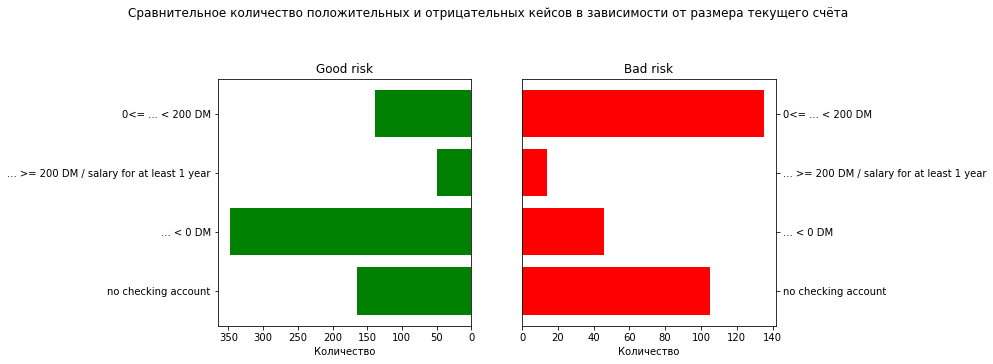

In [80]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта')
ax1 = fig.add_subplot(221)
ax1.barh(y = df['status'].unique(), width= df[df['credit_risk'] == "good"].groupby("status")["duration"].count(), color= "green");
ax1.invert_xaxis()
plt.title("Good risk")
ax1.set_xlabel("Количество")
ax2 = fig.add_subplot(222)
ax2.barh(y = df['status'].unique(), width = df[df['credit_risk'] == "bad"].groupby("status")["duration"].count(), color= "red")
ax2.yaxis.tick_right()
plt.title("Bad risk")
ax2.set_xlabel("Количество")
plt.show()

### Задание 8  (0.5 балла)

In [31]:
import seaborn as sns

Теперь рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn и более классических гистограмм. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

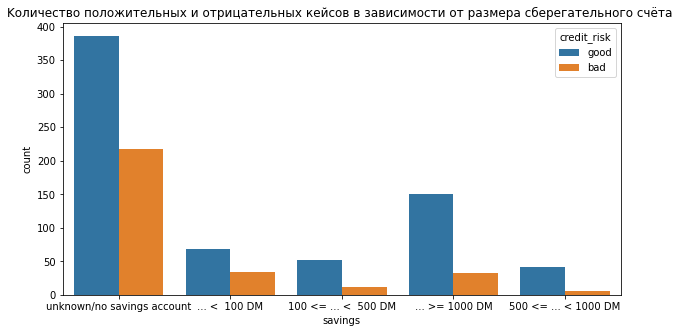

In [32]:
plt.figure(figsize=(10,5))
plt.title("Kоличество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта ")
sns.countplot(x = df['savings'], hue= df["credit_risk"]);

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

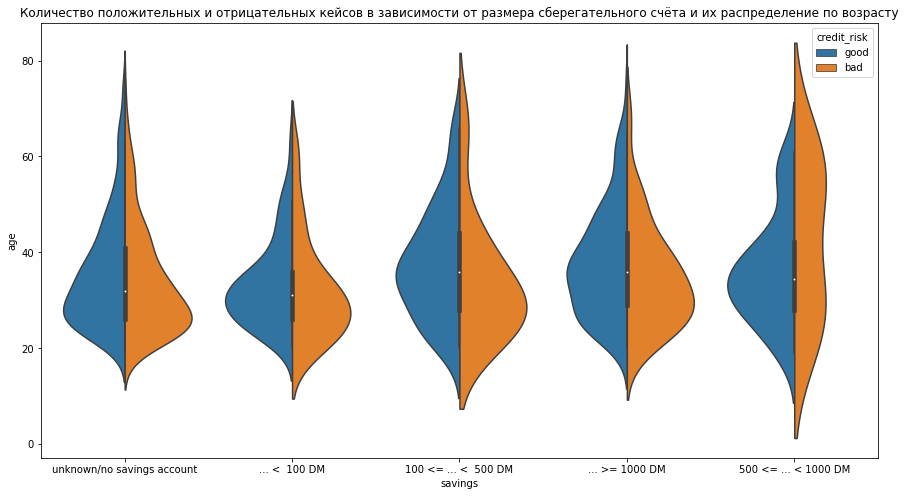

In [33]:
plt.figure(figsize=(15,8))
plt.title("Количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта и их распределение по возрасту")
sns.violinplot(x="savings", y="age", data=df, hue='credit_risk', split=True);

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

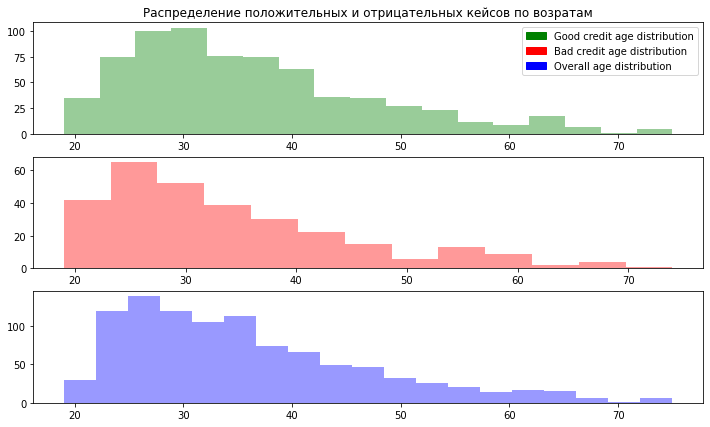

In [85]:
import matplotlib.patches as ozivashka
plt.figure(figsize=(12, 7))
green_patch = ozivashka.Patch(color='green', label='Good credit age distribution')
red_patch = ozivashka.Patch(color='red', label='Bad credit age distribution')
blue_patch = ozivashka.Patch(color='blue', label='Overall age distribution')
plt.subplot(3, 1, 1)
sns.distplot(x = df[df['credit_risk'] == "good"]['age'], color= "green", kde= False)
plt.title("Распределение положительных и отрицательных кейсов по возратам")
plt.legend(handles=[green_patch, red_patch, blue_patch])
plt.subplot(3, 1, 2)
sns.distplot(x = df[df['credit_risk'] == "bad"]['age'], color= "red", kde= False)
plt.subplot(3, 1, 3)
sns.distplot(x = df['age'], color= "blue", kde= False);

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

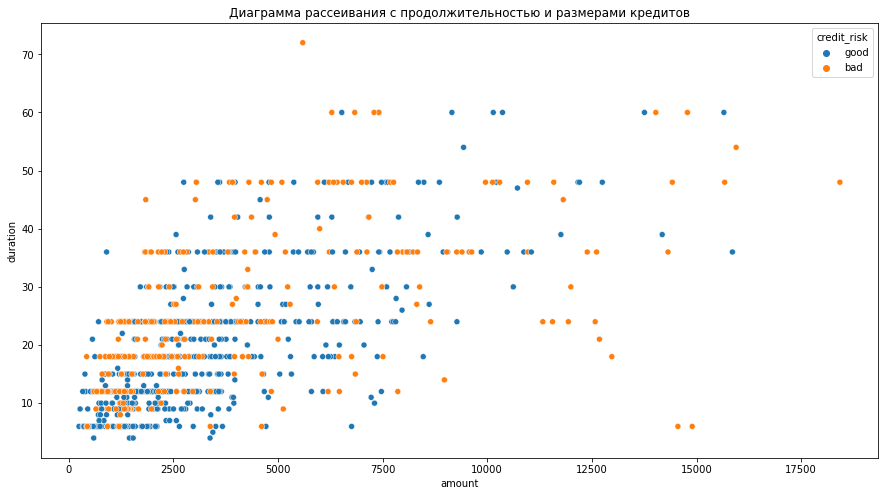

In [86]:
plt.figure(figsize=(15,8))
plt.title("Диаграмма рассеивания с продолжительностью и размерами кредитов")
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=df);

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

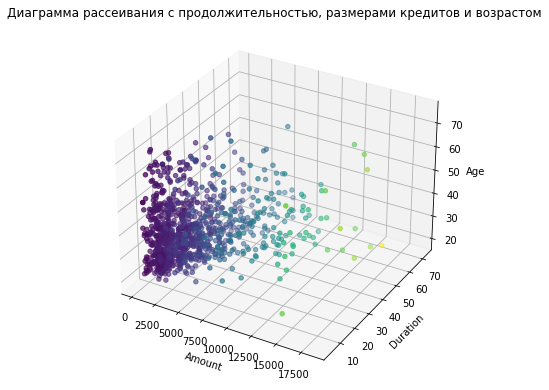

In [87]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
x = df["amount"]
y = df["duration"]
z = df["age"]
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.title("Диаграмма рассеивания с продолжительностью, размерами кредитов и возрастом")
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений (0, .., n). Избавьтесь от номинальных признаков.

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
for i in binar:
    label = LabelEncoder()
    df[i] = label.fit_transform(df[i])
df[binar] 

,people_liable,telephone,foreign_worker,credit_risk
0,0,0,0,1
1,1,0,0,1
2,0,0,0,1
3,1,0,1,1
4,0,0,1,1
...,...,...,...,...
995,1,0,0,0
996,0,0,0,0
997,0,1,0,0
998,0,1,0,0


In [90]:
for i in poryadkov:
    label = LabelEncoder()
    df[i] = label.fit_transform(df[i])
df[poryadkov] 

,savings,employment_duration,installment_rate,present_residence,number_credits
0,4,2,2,3,0
1,4,0,1,0,1
2,0,1,1,3,0
3,4,0,0,0,1
4,4,0,2,3,1
...,...,...,...,...,...
995,4,0,1,3,0
996,4,3,2,2,0
997,1,3,2,3,0
998,1,4,1,2,0


In [91]:
df.drop(nominal, axis=1, inplace=True)

In [92]:
df.drop("kat_number_credits", axis=1)

,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,4,2,2,3,21,0,0,0,0,1
1,9,2799,4,0,1,0,36,1,1,0,0,1
2,12,841,0,1,1,3,23,0,0,0,0,1
3,12,2122,4,0,0,0,39,1,1,0,1,1
4,12,2171,4,0,2,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,4,0,1,3,21,0,1,0,0,0
996,24,2303,4,3,2,2,45,0,0,0,0,0
997,21,12680,1,3,2,3,30,0,0,1,0,0
998,12,6468,1,4,1,2,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше! Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [95]:
def predict(Xtest: np.array) -> np.array:
    k = []
    for i in Xtest:
        a =  i * [-3, -6, -2, -2, -1, -4, 2, -6, -1, 1, 1, 1] # Берем магические коэфиценты
        mini = a.min()
        maxi = a.max()
        sr_sum = (mini + maxi)* 12 / 2
        if a.sum() < sr_sum: # Сравниваем сумму взвешенных параметров со средней
            k.append(0)
        else:
            k.append(1)
    return np.array(k)
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.66